In [91]:
import librosa
audio_file_path = 'UrbanSound8K/street_music.wav'
librosa_audio_data,librosa_sample_rate = librosa.load(audio_file_path)

In [92]:
print(librosa_audio_data)

[ 0.01117232  0.01807125  0.01534632 ... -0.08723455 -0.10228398
 -0.11784094]


In [93]:
print(librosa_sample_rate)

22050


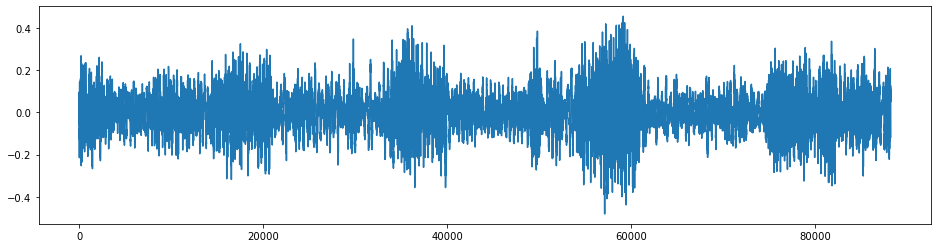

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (16,4))
plt.plot(librosa_audio_data)

In [95]:
from scipy.io import wavfile as wav
wave_sample_rate,wave_audio = wav.read(audio_file_path)

In [96]:
wave_audio

array([[ 1898,  -842],
       [ 1862,  -884],
       [ 1870,  -780],
       ...,
       [-3234, -3785],
       [-3314, -3983],
       [-3376, -4283]], dtype=int16)

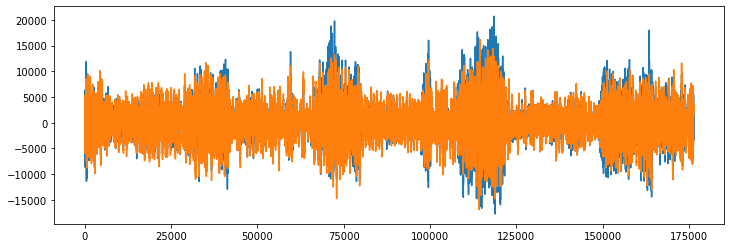

In [97]:
plt.figure(figsize = (12,4))
#original audio has 2 channels and libros converts it into a mono channel signal
plt.plot(wave_audio)

### Feature Generation
Here we will be using Mel-Frequency Cepstral Coefficient(MFCC).
The mel-frequency cepstrum is a representation of the short-term power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency.

In [21]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data,sr=librosa_sample_rate,n_mfcc=40)

mfccs.shape

(40, 173)

In [22]:
mfccs

array([[-126.76198   , -137.95744   , -172.62373   , ..., -211.37576   ,
        -217.6541    , -211.0878    ],
       [ 135.35309   ,  130.39949   ,  110.667175  , ...,  119.38637   ,
         122.79739   ,  124.919754  ],
       [ -24.16372   ,  -16.455236  ,    1.6733272 , ...,  -11.492995  ,
         -12.449388  ,  -14.344221  ],
       ...,
       [  -0.75091565,   -1.2417626 ,    0.41020536, ...,  -18.881168  ,
         -15.691137  ,  -12.408333  ],
       [  -7.6755676 ,   -2.8025641 ,    9.2916355 , ...,  -18.008043  ,
         -12.606062  ,   -9.547588  ],
       [   0.26161802,    2.0886045 ,    0.82110894, ...,   14.86132   ,
          18.144629  ,   15.274844  ]], dtype=float32)

In [24]:
import pandas as pd
import os
import librosa 

audio_dataset_path = 'UrbanSound8K/audio/'
metadata = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [33]:
def feature_extractor(file):
    audio,sample_rate = librosa.load(file_name,res_type = 'kaiser_fast')
    mfccs_feature = librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_feature.T,axis=0)
    
    return mfccs_scaled_features

In [34]:
import numpy as np
from tqdm import tqdm

extracted_feature = []
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row['slice_file_name']))
    final_class_labels = row['class']
    data = feature_extractor(file_name)
    extracted_feature.append([data,final_class_labels])

3555it [09:25,  6.25it/s]C:\Users\Amitesh Gangrade\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8325it [21:49,  8.84it/s]C:\Users\Amitesh Gangrade\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
8328it [21:50, 10.99it/s]C:\Users\Amitesh Gangrade\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8732it [22:51,  6.37it/s]


In [140]:
extracted_featrues_df = pd.DataFrame(extracted_feature,columns=['feature','class'])
extracted_featrues_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.091328,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01073, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265694,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.608585, 1....",children_playing


In [141]:
X = np.array(extracted_featrues_df['feature'].tolist())
y = np.array(extracted_featrues_df['class'].tolist())

In [142]:
X.shape

(8732, 40)

In [143]:
#y = np.array(pd.get_dummies(y))
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(y))

In [144]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [145]:
y.shape

(8732, 10)

In [146]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [147]:
X_train.shape

(6985, 40)

In [148]:
X_test.shape

(1747, 40)

In [149]:
X

array([[-2.15793015e+02,  7.16661224e+01, -1.31813766e+02, ...,
        -1.68275917e+00, -8.85858655e-01,  3.54388922e-01],
       [-4.24686768e+02,  1.10562271e+02, -5.41482353e+01, ...,
         6.17408633e-01, -6.84974134e-01,  5.71514487e-01],
       [-4.59564667e+02,  1.22800354e+02, -4.79247093e+01, ...,
         2.22541404e+00,  1.54661775e+00, -8.36315870e-01],
       ...,
       [-3.04613159e+02,  1.12619904e+02, -4.71619453e+01, ...,
        -3.03358102e+00,  2.71057296e+00,  7.67189503e+00],
       [-3.44714233e+02,  1.26758133e+02, -5.61771698e+01, ...,
        -7.80225849e+00, -1.77907372e+00,  5.83541918e+00],
       [-3.15933838e+02,  9.56758881e+01, -3.80477676e+01, ...,
         5.77580512e-01, -1.14637651e+01, -5.96535349e+00]], dtype=float32)

## Model Creation 

In [150]:
import tensorflow as tf
from tensorflow import keras

In [156]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [157]:
num_labels = y.shape[1]

In [158]:
model = Sequential()
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(200))
model.add(Activation('relu')
model.add(Dropout(0.5))
model.add(BatchNormalization())    
    
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

SyntaxError: invalid syntax (<ipython-input-158-ec842bb7a70a>, line 9)

In [159]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 100)               4100      
_________________________________________________________________
activation_16 (Activation)   (None, 100)               0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 200)               20200     
_________________________________________________________________
activation_17 (Activation)   (None, 200)               0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 100)              

In [160]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())

In [162]:
from keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath = 'save_model/audio_classsification.hgf5',
                              verbose=1,save_best_only=True)
start = datetime.now()

model.fit(X_train,y_train,batch_size=num_batch_size,epochs=num_epochs,validation_data=(X_test,y_test),callbacks=[checkpointer])

duration=datetime.now()-start
print("Training Completed in Time",duration)


Epoch 1/100
219/219 [==============================] - 0s 2ms/step - loss: 0.9600 - accuracy: 0.6879 - val_loss: 0.7582 - val_accuracy: 0.7647

Epoch 00001: val_loss improved from inf to 0.75823, saving model to save_model\audio_classsification.hgf5
INFO:tensorflow:Assets written to: save_model\audio_classsification.hgf5\assets
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.9731 - accuracy: 0.6825 - val_loss: 0.7467 - val_accuracy: 0.7831

Epoch 00002: val_loss improved from 0.75823 to 0.74667, saving model to save_model\audio_classsification.hgf5
INFO:tensorflow:Assets written to: save_model\audio_classsification.hgf5\assets
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.9585 - accuracy: 0.6849 - val_loss: 0.7452 - val_accuracy: 0.7739

Epoch 00003: val_loss improved from 0.74667 to 0.74523, saving model to save_model\audio_classsification.hgf5
INFO:tensorflow:Assets written to: save_model\audio_classsification.hgf5\assets
Ep

219/219 [==============================] - 1s 3ms/step - loss: 0.9064 - accuracy: 0.7028 - val_loss: 0.7434 - val_accuracy: 0.7773

Epoch 00035: val_loss did not improve from 0.68391
Epoch 36/100
219/219 [==============================] - 0s 2ms/step - loss: 0.9050 - accuracy: 0.7014 - val_loss: 0.7170 - val_accuracy: 0.7813

Epoch 00036: val_loss did not improve from 0.68391
Epoch 37/100
219/219 [==============================] - 0s 2ms/step - loss: 0.9105 - accuracy: 0.7054 - val_loss: 0.7080 - val_accuracy: 0.7779

Epoch 00037: val_loss did not improve from 0.68391
Epoch 38/100
219/219 [==============================] - 0s 2ms/step - loss: 0.9259 - accuracy: 0.6969 - val_loss: 0.6986 - val_accuracy: 0.7945

Epoch 00038: val_loss did not improve from 0.68391
Epoch 39/100
219/219 [==============================] - 0s 2ms/step - loss: 0.9102 - accuracy: 0.7052 - val_loss: 0.6764 - val_accuracy: 0.7888

Epoch 00039: val_loss improved from 0.68391 to 0.67636, saving model to save_model\a

219/219 [==============================] - 0s 2ms/step - loss: 0.8827 - accuracy: 0.7015 - val_loss: 0.6516 - val_accuracy: 0.7997

Epoch 00075: val_loss did not improve from 0.65091
Epoch 76/100
219/219 [==============================] - 0s 2ms/step - loss: 0.8788 - accuracy: 0.7105 - val_loss: 0.6494 - val_accuracy: 0.8002

Epoch 00076: val_loss improved from 0.65091 to 0.64944, saving model to save_model\audio_classsification.hgf5
INFO:tensorflow:Assets written to: save_model\audio_classsification.hgf5\assets
Epoch 77/100
219/219 [==============================] - 1s 4ms/step - loss: 0.8995 - accuracy: 0.7006 - val_loss: 0.6825 - val_accuracy: 0.7945

Epoch 00077: val_loss did not improve from 0.64944
Epoch 78/100
219/219 [==============================] - 1s 4ms/step - loss: 0.8628 - accuracy: 0.7200 - val_loss: 0.6457 - val_accuracy: 0.8071

Epoch 00078: val_loss improved from 0.64944 to 0.64569, saving model to save_model\audio_classsification.hgf5
INFO:tensorflow:Assets written 

In [163]:
test_accuracy = model.evaluate(X_test,y_test)
print(test_accuracy[1])

55/55 [==============================] - 0s 758us/step - loss: 0.6520 - accuracy: 0.8037
0.803663432598114


In [166]:
filename = 'UrbanSound8K/street_music.wav'
audio , sample_rate = librosa.load(filename,res_type='kaiser_fast')
mfccs_feature = librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_feature.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label = model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class


[-199.98415     133.4582      -11.208044     44.632393      4.839844
   37.756027    -10.896253      2.2862375    -7.9334183    12.67786
   -2.6515343    19.297394      0.8803502    14.890311     -1.272965
   10.959211     -2.0266924     1.8953133    -4.7131896     5.424865
   -2.1816185     2.5593429    -0.40948355    3.3399065     1.4397225
    1.3475944     1.1428452     2.0768845    -2.5267384    -1.3907377
    0.50546575    1.004332      0.60995644   -4.4666576    -3.5463352
   -2.842668      1.4907689    -5.0530634    -2.0823505    -1.1124396 ]
[[-199.98415     133.4582      -11.208044     44.632393      4.839844
    37.756027    -10.896253      2.2862375    -7.9334183    12.67786
    -2.6515343    19.297394      0.8803502    14.890311     -1.272965
    10.959211     -2.0266924     1.8953133    -4.7131896     5.424865
    -2.1816185     2.5593429    -0.40948355    3.3399065     1.4397225
     1.3475944     1.1428452     2.0768845    -2.5267384    -1.3907377
     0.50546575    1.0

C:\Users\Amitesh Gangrade\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array(['street_music'], dtype='<U16')